In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import copy
from networkFunctions import *
from plotFunctions import *

In [2]:
#Network parameters
msgUtility = 10
costFactor = 0.1
numNodes = 100
numMsg = 200
myseed = 32
maxEpochs = 10000
msgCost = costFactor*msgUtility

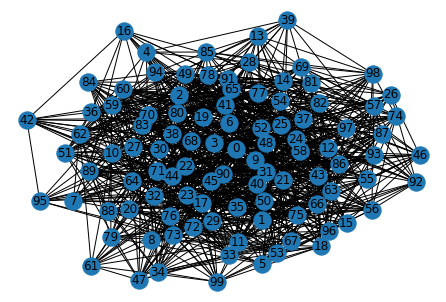

In [3]:
G = nx.erdos_renyi_graph(numNodes, 0.2, seed=myseed)
myPos = nx.spring_layout(G, seed = 40)
nx.draw(G, pos=myPos, with_labels=True)

In [4]:
prevStates = []
maxEpochs = 1
commonAttrs = {"burnoutThreshold":2*(numMsg*costFactor*msgUtility)/numNodes,"burnoutDrop":2}

attr = "type"
# attrRange = np.arange(5*msgCost, 50*msgCost, 5)
attrRange = ["Utilitarian","Deontology", "Virtue"]
outcomeNetwork = {}
# type = "Deontology"

for val in attrRange:
    if attr == "type":
        type = val
    else:
        commonAttrs[attr] = val
    initGraph(G, numNodes, commonAttrs, type = type)
    e = 0
    while e<maxEpochs:
        e+=1
        msgList = createMsgs(numMsg, numNodes, G)  #Message list creation
        prevStates = [copy.deepcopy(G.nodes[i]['agent']) for i in range(numNodes)]
        nf, nd = transmitMsgs(msgList, G)
        curStable = [G.nodes[i]['agent'].isStable(prevStates[i]) for i in range(numNodes)]
        if np.count_nonzero(curStable) == numNodes:
            break
    outcomeNetwork[val] = copy.deepcopy(G)

In [5]:
outcomeNetwork

{'Utilitarian': <networkx.classes.graph.Graph at 0x7fd1599e99d0>,
 'Deontology': <networkx.classes.graph.Graph at 0x7fd1599e9f40>,
 'Virtue': <networkx.classes.graph.Graph at 0x7fd159a69190>}

In [6]:
print([getNetworkProp(outcomeNetwork[val], 'burnout') for val in outcomeNetwork])

[[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]]


yerr  [4.701772715334788, 4.720640257893462, 4.903060268852506]
[14.8, 11.2, 14.2]


/Users/janvichhabra/Documents/acad/Comparative-Ethics/plotFunctions.py:72: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.bar(x,y,yerr=ystd, color='brg', align='center', alpha=0.5, ecolor='black', capsize=10)
/Users/janvichhabra/Documents/acad/Comparative-Ethics/plotFunctions.py:87: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(range(len(outcomeNetwork)),list(outcomeNetwork.keys()))


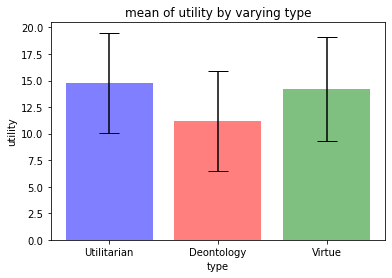

In [7]:
utility_list = plotNetworkVaryParams(outcomeNetwork, 'utility', attr, plotType="bar", metric="mean")
print(utility_list)

yerr  [0.5746883213244085, 0.5643481982684883, 0.5662645632171905]
[3.74, 3.56, 3.71]


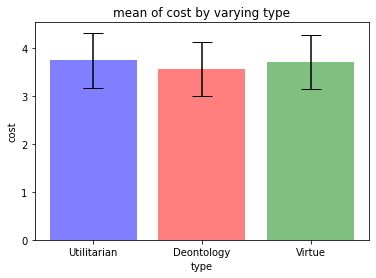

In [8]:
costList = plotNetworkVaryParams(outcomeNetwork, 'cost', attr, plotType="bar", metric="mean")
print(costList)

yerr  [0.14621141466307538, 0.13808210118138656, 0.14433756729740643]
[0.26, 0.22, 0.25]


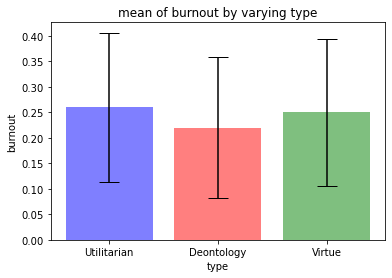

In [9]:
burnoutList = plotNetworkVaryParams(outcomeNetwork, 'burnout', attr, plotType="bar", metric="mean")
print(burnoutList)

yerr  [0.43107101760872557, 0.4063933507767512, 0.4328073731144401]
[1.74, 1.56, 1.71]


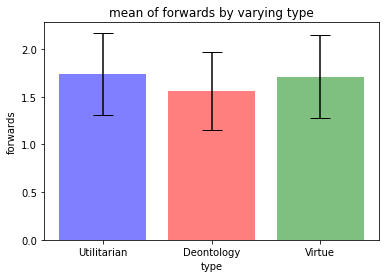

In [10]:
forwardsList = plotNetworkVaryParams(outcomeNetwork, 'forwards', attr, plotType="bar", metric="mean")
print(forwardsList)

yerr  [0.16069294390925265, 0.21766436956419347, 0.18436075745366443]
[0.26, 0.44, 0.29]


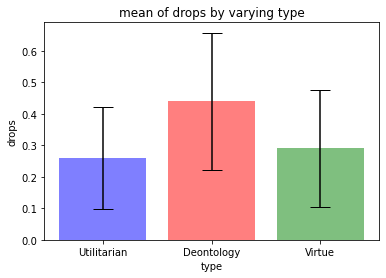

In [11]:
dropsList = plotNetworkVaryParams(outcomeNetwork, 'drops', attr, plotType="bar", metric="mean")
print(dropsList)

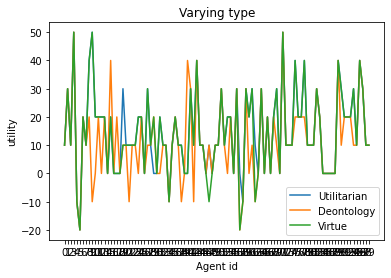

In [12]:
plotAgentWiseVaryParams(outcomeNetwork, "utility", attr, plotType="line")

/Users/janvichhabra/Documents/acad/Comparative-Ethics/plotFunctions.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(range(numNodes), propertyValues, color,markerfmt=color+'o', basefmt=" ", label=label)


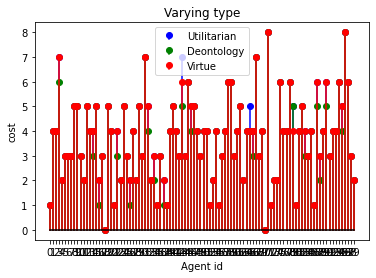

In [13]:
plotAgentWiseVaryParams(outcomeNetwork, "cost", attr, plotType="stem")

/Users/janvichhabra/Documents/acad/Comparative-Ethics/plotFunctions.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(range(numNodes), propertyValues, color,markerfmt=color+'o', basefmt=" ", label=label)


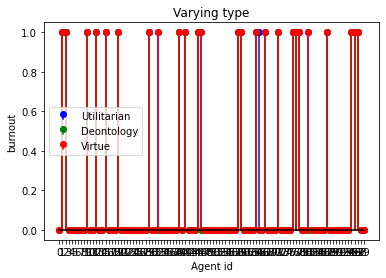

In [14]:
plotAgentWiseVaryParams(outcomeNetwork, "burnout", attr, plotType="stem")

UnboundLocalError: local variable 'y_stderror' referenced before assignment

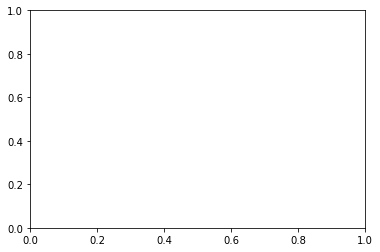

In [15]:
plotNetworkVaryParams(outcomeNetwork, 'utility', attr, plotType="bar")

[374.0, 356.0, 371.0]

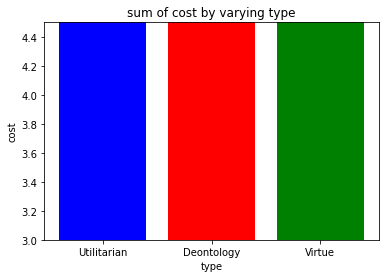

In [ ]:
plotNetworkVaryParams(outcomeNetwork, 'cost', attr, plotType="bar")

[26, 22, 25]

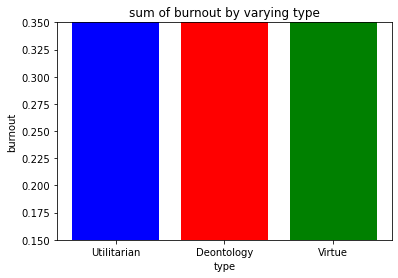

In [ ]:
plotNetworkVaryParams(outcomeNetwork, 'burnout', attr, plotType="bar")

[174, 156, 171]

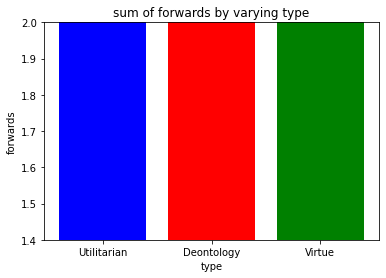

In [ ]:
plotNetworkVaryParams(outcomeNetwork, 'forwards', attr, plotType="bar")

[26, 44, 29]

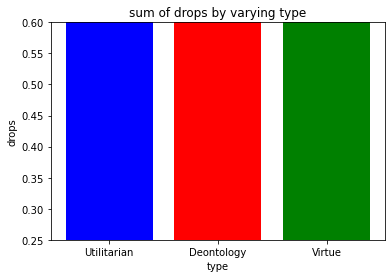

In [ ]:
plotNetworkVaryParams(outcomeNetwork, 'drops', attr, plotType="bar")

In [ ]:
print(G.nodes[0]['agent'].burnoutCount)
print(G.nodes[0]['agent'].burnoutThreshold)

0
4.0


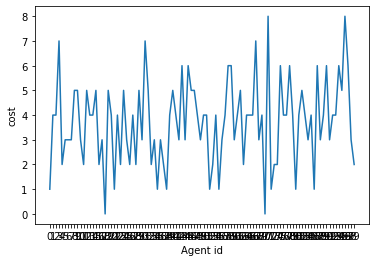

In [ ]:
plotAgentwiseProp(G, "cost")

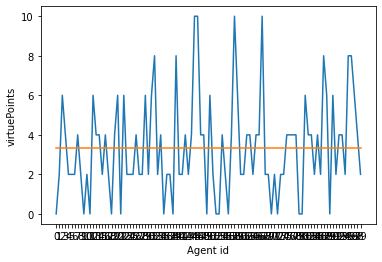

In [ ]:
plotAgentwiseProp(G, "virtuePoints", plotMean=True)

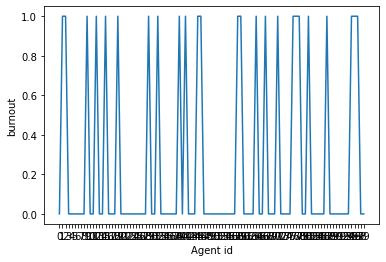

In [ ]:
plotAgentwiseProp(G, "burnout")

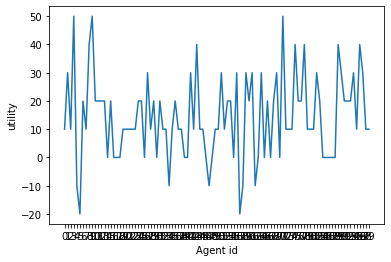

In [ ]:
plotAgentwiseProp(G, "utility")